<a href="https://colab.research.google.com/github/ShararOhee/Calculator/blob/main/25000dogsVScats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Kaggle

In [1]:
!pip install kaggle

#Configuring path of Kaggle.json file


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


Importing Dog vs Cat dataset

In [7]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:07<00:00, 186MB/s]
100% 812M/812M [00:07<00:00, 119MB/s]


listing all the files we have

In [8]:
!ls

dogs-vs-cats.zip  sample_data


In [9]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
import os
# counting the number of files in trained folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of Images: ", file_count)

Number of Images:  25000


Printing the name of the images

In [12]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.7428.jpg', 'dog.11685.jpg', 'cat.3332.jpg', 'dog.1595.jpg', 'dog.6740.jpg', 'cat.2642.jpg', 'dog.5381.jpg', 'dog.10417.jpg', 'dog.11271.jpg', 'cat.1708.jpg', 'cat.7682.jpg', 'cat.8005.jpg', 'dog.7780.jpg', 'cat.6444.jpg', 'dog.12229.jpg', 'cat.2332.jpg', 'dog.10601.jpg', 'cat.8684.jpg', 'cat.5198.jpg', 'dog.976.jpg', 'dog.10398.jpg', 'cat.2739.jpg', 'dog.4969.jpg', 'cat.7075.jpg', 'dog.75.jpg', 'cat.8983.jpg', 'cat.279.jpg', 'cat.6053.jpg', 'cat.10374.jpg', 'cat.6810.jpg', 'cat.10430.jpg', 'dog.9004.jpg', 'cat.9729.jpg', 'cat.887.jpg', 'dog.10139.jpg', 'dog.4330.jpg', 'cat.10311.jpg', 'cat.7517.jpg', 'cat.3017.jpg', 'cat.4798.jpg', 'cat.12460.jpg', 'cat.5093.jpg', 'dog.8864.jpg', 'dog.6946.jpg', 'dog.8549.jpg', 'cat.1344.jpg', 'cat.12115.jpg', 'dog.10030.jpg', 'cat.1782.jpg', 'cat.5600.jpg', 'dog.10707.jpg', 'dog.7202.jpg', 'cat.6597.jpg', 'cat.5710.jpg', 'dog.9202.jpg', 'dog.3093.jpg', 'dog.1915.jpg', 'cat.10434.jpg', 'cat.3860.jpg', 'dog.3071.jpg', 'cat.5462.jpg', 'cat.9395.jpg

Importing the dependencies

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Display the images

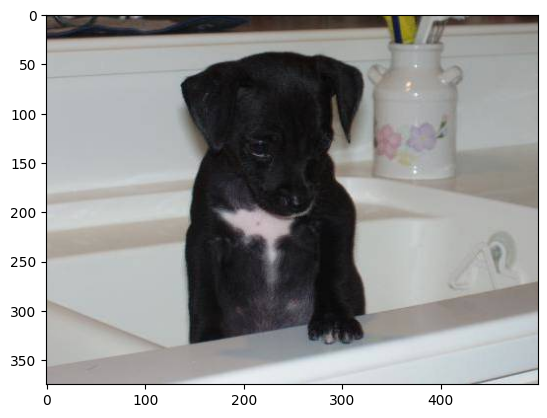

In [14]:
# display dog image

img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

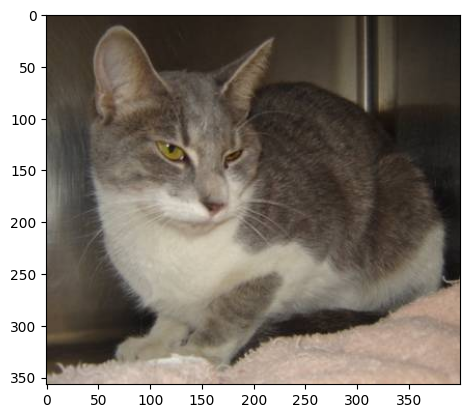

In [15]:
# display cat image

img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [16]:
file_names = os.listdir('/content/train')

# for img_file in file_names:

for i in range(5):

  name = file_names[i]
  print(file_names[i])


cat.7428.jpg
dog.11685.jpg
cat.3332.jpg
dog.1595.jpg
dog.6740.jpg


In [17]:
file_names = os.listdir('/content/train')

dog_count =0
cat_count =0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count +=1

  else:
    cat_count +=1

print("Number of dog images = ", dog_count)
print("Number of cat images = ", cat_count)

Number of dog images =  12500
Number of cat images =  12500


Resizing all the images

In [18]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [31]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)


In [34]:
# display resized dog image

img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/image resized/dog.8298.jpg'

In [22]:
# display resized cat image

img = mpimg.imread('/content/image resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/image resized/cat.4352.jpg'

Creating labels for resized images of dogs and cats

Cat --> 0
Dog --> 1

In [35]:
#creating a for loop to assign labels

filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [36]:
print(filenames[0:5])
print(len(filenames))

['cat.7428.jpg', 'dog.11685.jpg', 'cat.3332.jpg', 'dog.1595.jpg', 'dog.6740.jpg']
2000


In [37]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 1, 1]
2000


In [38]:
# counting the images of dogs and cats out of the 25000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1006  994]


Converting all the resized images to numpy arrays

In [39]:
import cv2
import glob


In [40]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [41]:
print(dog_cat_images)

[[[[121 130 133]
   [119 128 131]
   [118 127 130]
   ...
   [ 87 124 132]
   [ 87 127 139]
   [ 64 106 118]]

  [[125 134 137]
   [123 132 135]
   [121 130 133]
   ...
   [ 87 124 132]
   [ 87 127 139]
   [ 63 105 117]]

  [[129 138 141]
   [127 136 139]
   [125 134 137]
   ...
   [ 89 126 134]
   [ 86 126 138]
   [ 62 104 116]]

  ...

  [[ 58  94 142]
   [ 79 118 163]
   [100 142 184]
   ...
   [117 154 168]
   [116 153 167]
   [116 153 167]]

  [[ 58  85 152]
   [ 75 106 169]
   [ 83 120 178]
   ...
   [117 154 168]
   [116 153 167]
   [115 152 166]]

  [[ 61  85 161]
   [ 74 101 175]
   [ 74 108 174]
   ...
   [117 154 168]
   [116 153 167]
   [115 152 166]]]


 [[[ 97 151 152]
   [ 97 151 152]
   [100 150 150]
   ...
   [ 36 110  74]
   [ 44 117  85]
   [ 69 142 110]]

  [[101 155 155]
   [103 157 157]
   [ 90 142 142]
   ...
   [ 61 135  99]
   [ 60 133 101]
   [ 68 141 109]]

  [[102 159 156]
   [109 167 162]
   [ 83 141 136]
   ...
   [ 77 151 115]
   [ 75 148 116]
   [ 73 146

In [42]:
type(dog_cat_images)

numpy.ndarray

In [43]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [44]:
X = dog_cat_images
Y = np.asarray(labels)

*Train Test Split*

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images
400-->  test images

In [47]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [48]:
print(X_train_scaled)

[[[[0.03921569 0.01568627 0.01960784]
   [0.03529412 0.01568627 0.01960784]
   [0.03137255 0.01568627 0.03529412]
   ...
   [0.56470588 0.56078431 0.50588235]
   [0.61568627 0.61176471 0.55686275]
   [0.5372549  0.53333333 0.47843137]]

  [[0.09803922 0.07843137 0.08235294]
   [0.08235294 0.07058824 0.07843137]
   [0.0627451  0.05882353 0.0745098 ]
   ...
   [0.54901961 0.54509804 0.49019608]
   [0.59607843 0.59215686 0.5372549 ]
   [0.51764706 0.51372549 0.45882353]]

  [[0.03921569 0.03529412 0.04313725]
   [0.03137255 0.03921569 0.04313725]
   [0.02352941 0.03529412 0.05098039]
   ...
   [0.55686275 0.55686275 0.49411765]
   [0.59607843 0.59607843 0.53333333]
   [0.51372549 0.51372549 0.45098039]]

  ...

  [[0.5372549  0.64705882 0.64705882]
   [0.52156863 0.63137255 0.63137255]
   [0.49803922 0.60784314 0.60784314]
   ...
   [0.3372549  0.41176471 0.43137255]
   [0.30980392 0.38431373 0.40392157]
   [0.30588235 0.38039216 0.4       ]]

  [[0.50588235 0.62352941 0.62745098]
   [0.5

Building the Neural Network

In [49]:
#import tensorflow as tf
#import tensorflow_hub as hub


In [51]:
#mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

#pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)


In [62]:
import tensorflow as tf
import tensorflow_hub as hub

# Check Keras version and import tf_keras if necessary
if tf.keras.__version__.startswith("3."):
    import tf_keras as keras
else:
    keras = tf.keras

num_of_classes = 2
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

# Use keras.Sequential instead of tf.keras.Sequential
model = keras.Sequential([
    pretrained_model,
    keras.layers.Dense(num_of_classes) # Use keras.layers
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [63]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [64]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 64s 1s/step - loss: 0.2033 - acc: 0.9194
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0602 - acc: 0.9831
Epoch 3/5
50/50 [==============================] - 56s 1s/step - loss: 0.0423 - acc: 0.9875
Epoch 4/5
50/50 [==============================] - 57s 1s/step - loss: 0.0331 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 55s 1s/step - loss: 0.0263 - acc: 0.9944


In [65]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss: ', score)
print('Test accuracy: ', acc)

13/13 [==============================] - 14s 975ms/step - loss: 0.0815 - acc: 0.9800
Test loss:  0.08151654154062271
Test accuracy:  0.9800000190734863


Predictive System

Enter the path of the image to be predicted: /content/cat.jpg


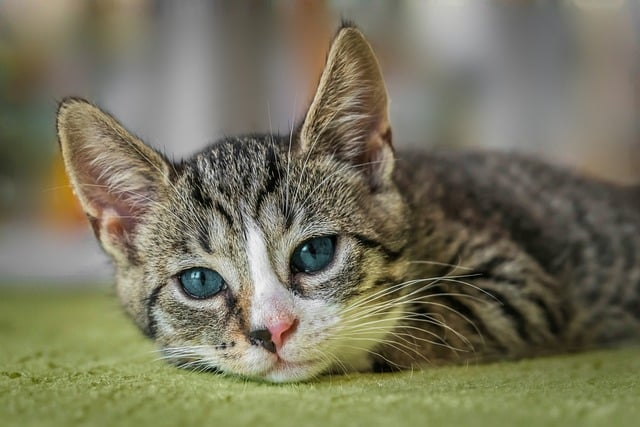

1/1 [==============================] - 0s 70ms/step
[[ 3.1153016 -2.858727 ]]
0
The image is a cat


In [69]:
input_image_path = input('Enter the path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image is a cat')

else:
  print('The image is a dog')